In [1]:
import numpy as np
import csv
import random
import matplotlib.pyplot as plt

random.seed(0)
cantArchivos = 800

In [28]:
def generarArchivo(nombre, tamanio):
    archivo = open("inputs/" + nombre, "w")
    for i in range(tamanio):
        ## longitud promedio = ~5 letras
        palabra = "".join([chr(random.randint(ord('a'), ord('z'))) for _ in range(random.randint(2, 10))]) + '\n'
        archivo.write(palabra)
    archivo.close()

In [3]:
for i in range(cantArchivos):
    generarArchivo("archivo-" + str(i), random.randint(1, 100) * 5)

In [26]:
with open(f'outputs/tiempos-{cantArchivos}.csv') as csvfile:
    filas = csv.reader(csvfile)
    filas = list(filas)[1:]
threads = [int(f[0]) for f in filas]

Text(0, 0.5, 'Tiempo de ejecucion (s)')

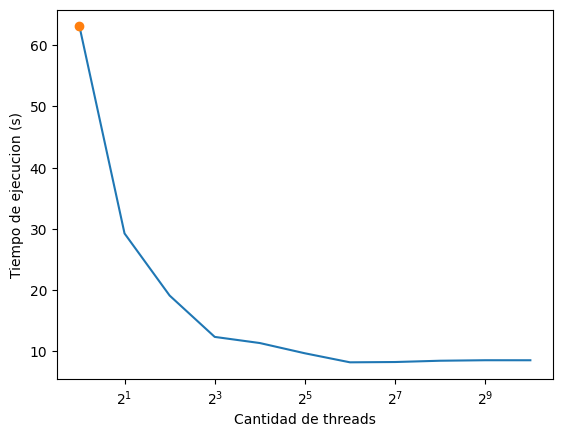

In [27]:
tiempo_archivos = [float(f[1]) for f in filas]

plt.xscale("log", base = 2)
plt.plot(threads, tiempo_archivos)
plt.plot([threads[0]], [tiempo_archivos[0]], "o")
plt.xlabel("Cantidad de threads")
plt.ylabel("Tiempo de ejecucion (s)")

Text(0, 0.5, 'Tiempo de ejecucion (s)')

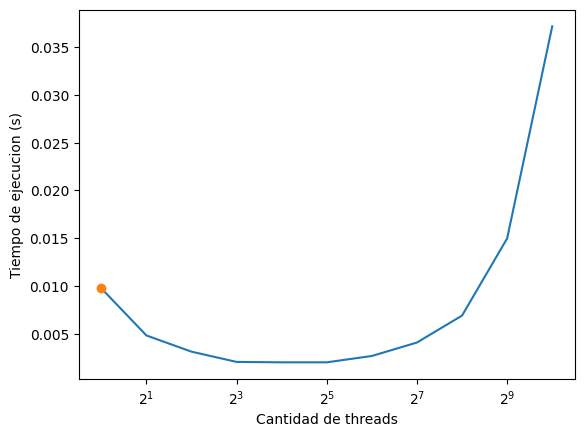

In [25]:
tiempo_maximo = [float(f[2]) for f in filas]

plt.xscale("log", base = 2)
plt.plot(threads, tiempo_maximo)
plt.plot([threads[0]], [tiempo_maximo[0]], "o")
plt.xlabel("Cantidad de threads")
plt.ylabel("Tiempo de ejecucion (s)")